In [500]:
"""
    Feature engineering in training data and building up the model
"""

'\n    Feature engineering in training data and building up the model\n'

In [157]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [158]:
# Finding the csv from the league
# Multi League directory
country = 'IT'
dirCountry = '../' + country + '/'
# csv to save
file_title = 'serieA_36.csv'
csv_file = dirCountry + file_title

In [159]:
# Testing against current season
current_season = 2019

In [160]:
# Retrieving previous saved data
df_laliga = pd.read_csv(csv_file) 
df_laliga = df_laliga.drop(df_laliga.columns[0], axis=1)
df_laliga = df_laliga.drop(columns=["stats_home","stats_away"], axis=1)

In [161]:
# None values set to 0
df_laliga.fillna(value=0, inplace=True)

In [162]:
# g_diff_home: an integer of the goals difference for home
df_laliga["g_diff_home"] = df_laliga["goals_home"] - df_laliga["goals_away"]
df_laliga.head()

,id,week,goals_home,goals_away,league,season,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,...,stats_away.corners,stats_away.offside,stats_away.possession,stats_away.c_yellow,stats_away.c_red,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,g_diff_home
0,232587,7,1.0,0.0,135,2019,502,Fiorentina,11,43,...,3.0,0.0,50%,2.0,0.0,3.0,426.0,334.0,78%,1.0
1,232885,37,0.0,0.0,135,2019,502,Fiorentina,11,43,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
2,232656,14,0.0,1.0,135,2019,502,Fiorentina,11,43,...,2.0,2.0,38%,3.0,0.0,6.0,348.0,263.0,76%,-1.0
3,232744,23,1.0,2.0,135,2019,502,Fiorentina,11,43,...,3.0,1.0,68%,2.0,0.0,3.0,552.0,470.0,85%,-1.0
4,232768,25,1.0,1.0,135,2019,502,Fiorentina,11,43,...,3.0,7.0,60%,3.0,0.0,5.0,506.0,418.0,83%,0.0


In [163]:
# g_diff_away: an integer of the goals difference for away
df_laliga["g_diff_away"] = df_laliga["goals_away"] - df_laliga["goals_home"]
df_laliga.head()

,id,week,goals_home,goals_away,league,season,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,...,stats_away.offside,stats_away.possession,stats_away.c_yellow,stats_away.c_red,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away
0,232587,7,1.0,0.0,135,2019,502,Fiorentina,11,43,...,0.0,50%,2.0,0.0,3.0,426.0,334.0,78%,1.0,-1.0
1,232885,37,0.0,0.0,135,2019,502,Fiorentina,11,43,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
2,232656,14,0.0,1.0,135,2019,502,Fiorentina,11,43,...,2.0,38%,3.0,0.0,6.0,348.0,263.0,76%,-1.0,1.0
3,232744,23,1.0,2.0,135,2019,502,Fiorentina,11,43,...,1.0,68%,2.0,0.0,3.0,552.0,470.0,85%,-1.0,1.0
4,232768,25,1.0,1.0,135,2019,502,Fiorentina,11,43,...,7.0,60%,3.0,0.0,5.0,506.0,418.0,83%,0.0,0.0


In [164]:
# Set win as 1, draw as 0 and lose as -1
def get_status(r):
    if r["goals_home"] > r["goals_away"]:
        return 1
    elif r["goals_home"] == r["goals_away"]:
        return 0
    else:
        return -1

In [165]:
"""
    Form: last 5 losses
        last 5 wins
        last 5 draws
"""
# Home
df_laliga["wins_home"] = df_laliga["team_home.form"].apply(lambda x: x.count('W'))
df_laliga["loses_home"] = df_laliga["team_home.form"].apply(lambda x: x.count('L'))
df_laliga["draws_home"] = df_laliga["team_home.form"].apply(lambda x: x.count('D'))
# Away
df_laliga["wins_away"] = df_laliga["team_away.form"].apply(lambda x: x.count('W'))
df_laliga["loses_away"] = df_laliga["team_away.form"].apply(lambda x: x.count('L'))
df_laliga["draws_away"] = df_laliga["team_away.form"].apply(lambda x: x.count('D'))

df_laliga.head()

,id,week,goals_home,goals_away,league,season,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,232587,7,1.0,0.0,135,2019,502,Fiorentina,11,43,...,334.0,78%,1.0,-1.0,2,0,3,2,2,1
1,232885,37,0.0,0.0,135,2019,502,Fiorentina,11,43,...,0.0,0,0.0,0.0,2,0,3,0,3,2
2,232656,14,0.0,1.0,135,2019,502,Fiorentina,11,43,...,263.0,76%,-1.0,1.0,2,0,3,2,2,1
3,232744,23,1.0,2.0,135,2019,502,Fiorentina,11,43,...,470.0,85%,-1.0,1.0,2,0,3,3,0,2
4,232768,25,1.0,1.0,135,2019,502,Fiorentina,11,43,...,418.0,83%,0.0,0.0,2,0,3,4,0,1


In [166]:
# Promotion: either Champions, UEFA Europe, Second division
# Label encoder vs Normalize unicode encoder
description = np.unique(df_laliga["team_home.description"].astype(str))
enc = preprocessing.LabelEncoder()
enc.fit(description)
df_laliga["team_home.description"] = enc.transform(df_laliga["team_home.description"].astype(str))
df_laliga["team_away.description"] = enc.transform(df_laliga["team_away.description"].astype(str))
df_laliga.head()

,id,week,goals_home,goals_away,league,season,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,232587,7,1.0,0.0,135,2019,502,Fiorentina,11,43,...,334.0,78%,1.0,-1.0,2,0,3,2,2,1
1,232885,37,0.0,0.0,135,2019,502,Fiorentina,11,43,...,0.0,0,0.0,0.0,2,0,3,0,3,2
2,232656,14,0.0,1.0,135,2019,502,Fiorentina,11,43,...,263.0,76%,-1.0,1.0,2,0,3,2,2,1
3,232744,23,1.0,2.0,135,2019,502,Fiorentina,11,43,...,470.0,85%,-1.0,1.0,2,0,3,3,0,2
4,232768,25,1.0,1.0,135,2019,502,Fiorentina,11,43,...,418.0,83%,0.0,0.0,2,0,3,4,0,1


In [167]:
# Group: conference west vs east
description = np.unique(df_laliga["team_home.group"].astype(str))
enc = preprocessing.LabelEncoder()
enc.fit(description)
df_laliga["team_home.group"] = enc.transform(df_laliga["team_home.group"].astype(str))
df_laliga["team_away.group"] = enc.transform(df_laliga["team_away.group"].astype(str))
df_laliga.head()

,id,week,goals_home,goals_away,league,season,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,232587,7,1.0,0.0,135,2019,502,Fiorentina,11,43,...,334.0,78%,1.0,-1.0,2,0,3,2,2,1
1,232885,37,0.0,0.0,135,2019,502,Fiorentina,11,43,...,0.0,0,0.0,0.0,2,0,3,0,3,2
2,232656,14,0.0,1.0,135,2019,502,Fiorentina,11,43,...,263.0,76%,-1.0,1.0,2,0,3,2,2,1
3,232744,23,1.0,2.0,135,2019,502,Fiorentina,11,43,...,470.0,85%,-1.0,1.0,2,0,3,3,0,2
4,232768,25,1.0,1.0,135,2019,502,Fiorentina,11,43,...,418.0,83%,0.0,0.0,2,0,3,4,0,1


In [168]:
def score_home(best):
    if best != 0:
        return int(best[0]) - int(best[2])
    return best

In [169]:
def score_away(best):
    if best != 0:
        return int(best[2]) - int(best[0])
    return best

In [170]:
# For best_lose
df_laliga["team_away.stats_home.streaks.best_lose"] = df_laliga["team_away.stats_home.streaks.best_lose"].apply(score_home)
df_laliga["team_away.stats_away.streaks.best_lose"] = df_laliga["team_away.stats_away.streaks.best_lose"].apply(score_away)
# For best_win
df_laliga["team_away.stats_home.streaks.best_win"] = df_laliga["team_away.stats_home.streaks.best_win"].apply(score_home)
df_laliga["team_away.stats_away.streaks.best_win"] = df_laliga["team_away.stats_away.streaks.best_win"].apply(score_away)
df_laliga.head()

,id,week,goals_home,goals_away,league,season,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,232587,7,1.0,0.0,135,2019,502,Fiorentina,11,43,...,334.0,78%,1.0,-1.0,2,0,3,2,2,1
1,232885,37,0.0,0.0,135,2019,502,Fiorentina,11,43,...,0.0,0,0.0,0.0,2,0,3,0,3,2
2,232656,14,0.0,1.0,135,2019,502,Fiorentina,11,43,...,263.0,76%,-1.0,1.0,2,0,3,2,2,1
3,232744,23,1.0,2.0,135,2019,502,Fiorentina,11,43,...,470.0,85%,-1.0,1.0,2,0,3,3,0,2
4,232768,25,1.0,1.0,135,2019,502,Fiorentina,11,43,...,418.0,83%,0.0,0.0,2,0,3,4,0,1


In [171]:
# For best_lose
df_laliga["team_home.stats_home.streaks.best_lose"] = df_laliga["team_home.stats_home.streaks.best_lose"].apply(score_home)
df_laliga["team_home.stats_away.streaks.best_lose"] = df_laliga["team_home.stats_away.streaks.best_lose"].apply(score_away)
# For best_win
df_laliga["team_home.stats_home.streaks.best_win"] = df_laliga["team_home.stats_home.streaks.best_win"].apply(score_home)
df_laliga["team_home.stats_away.streaks.best_win"] = df_laliga["team_home.stats_away.streaks.best_win"].apply(score_away)
df_laliga.head()

,id,week,goals_home,goals_away,league,season,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,232587,7,1.0,0.0,135,2019,502,Fiorentina,11,43,...,334.0,78%,1.0,-1.0,2,0,3,2,2,1
1,232885,37,0.0,0.0,135,2019,502,Fiorentina,11,43,...,0.0,0,0.0,0.0,2,0,3,0,3,2
2,232656,14,0.0,1.0,135,2019,502,Fiorentina,11,43,...,263.0,76%,-1.0,1.0,2,0,3,2,2,1
3,232744,23,1.0,2.0,135,2019,502,Fiorentina,11,43,...,470.0,85%,-1.0,1.0,2,0,3,3,0,2
4,232768,25,1.0,1.0,135,2019,502,Fiorentina,11,43,...,418.0,83%,0.0,0.0,2,0,3,4,0,1


In [172]:
# Posession % to decimal as p_percentage
df_laliga["stats_away.p_percentage"] = df_laliga["stats_away.p_percentage"].apply(lambda x: (int(str(x).strip('%'))/100))
df_laliga["stats_home.p_percentage"] = df_laliga["stats_home.p_percentage"].apply(lambda x: (int(str(x).strip('%'))/100))
df_laliga["stats_away.possession"] = df_laliga["stats_away.possession"].apply(lambda x: (int(str(x).strip('%'))/100))
df_laliga["stats_home.possession"] = df_laliga["stats_home.possession"].apply(lambda x: (int(str(x).strip('%'))/100))
df_laliga.head()

,id,week,goals_home,goals_away,league,season,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,232587,7,1.0,0.0,135,2019,502,Fiorentina,11,43,...,334.0,0.78,1.0,-1.0,2,0,3,2,2,1
1,232885,37,0.0,0.0,135,2019,502,Fiorentina,11,43,...,0.0,0.00,0.0,0.0,2,0,3,0,3,2
2,232656,14,0.0,1.0,135,2019,502,Fiorentina,11,43,...,263.0,0.76,-1.0,1.0,2,0,3,2,2,1
3,232744,23,1.0,2.0,135,2019,502,Fiorentina,11,43,...,470.0,0.85,-1.0,1.0,2,0,3,3,0,2
4,232768,25,1.0,1.0,135,2019,502,Fiorentina,11,43,...,418.0,0.83,0.0,0.0,2,0,3,4,0,1


In [173]:
"""
    Following this premise:
    - Away standings from home team aren't relevant
    - Home standings from away team aren't relevant
"""
# Drop away standings
df_premise = df_laliga.drop(df_laliga.filter(regex='team_away.stats_home.').columns, axis=1)
df_premise = df_laliga.drop(df_laliga.filter(regex='team_home.stats_away.').columns, axis=1)
print(df_premise.shape)

(380, 113)


In [101]:
"""
    Here the unseen data will be built as test set
"""
#p37 = [[531, 537], [529, 727], [543, 542], [538, 539], [545, 720], [546, 530], [798, 715], 
       #[541, 533], [548, 536], [532, 540], [542, 529], [530, 548], [540, 538], [715, 531], [537, 541], [539, 546], [727, 798], 
       #[536, 532], [533, 545], [720, 543]]
p38 = [[542, 529], [530, 548], [540, 538], [715, 531], [537, 541], [539, 546], [727, 798], 
       [536, 532], [533, 545], [720, 543]]

In [102]:
"""
    Here the unseen data will be built as test set - Premier
"""
p37 = [[42, 38], [44, 51], [49, 39], [52, 47], [45, 35], [46, 33], [50, 71], [34, 40], [41, 62], [48, 66]]

In [175]:
"""
    Here the unseen data will be built as test set - MLS is back
"""
p37 = [[1601, 1609], [1608, 1613], [1614, 1615], [1606, 1611], [2242, 1602], [1610, 1612], [1605, 1600],
       [1616, 1617], [1607, 1603], [1599, 1598]]

In [174]:
"""
    Here the unseen data will be built as test set - Serie A
"""
p37 = [[489, 499], [518, 523], [495, 505], [492, 488], [500, 867], [497, 502], [504, 487], [493, 503], 
       [490, 494], [496, 498], [523, 499], [505, 492], [487, 518], [488, 495], [494, 867], [498, 489], 
       [504, 493], [502, 500], [490, 496], [503, 497], [489, 490], [493, 502], [495, 504], [499, 505], 
       [492, 487], [867, 523], [496, 497], [518, 498], [500, 503], [488, 494]]

In [175]:
# Getting previous record
ts_laliga = pd.DataFrame()
ts_premise = pd.DataFrame()
for match in p37:
    ts_laliga = ts_laliga.append(df_laliga[(df_laliga["team_home.team.id"]==match[0]) & (df_laliga["team_away.team.id"]==match[1])])
    ts_premise = ts_premise.append(df_premise[(df_premise["team_home.team.id"]==match[0]) & (df_premise["team_away.team.id"]==match[1])])
ts_premise.head()

,id,week,goals_home,goals_away,league,season,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
289,232531,1,2.0,3.0,135,2019,489,AC Milan,6,59,...,378.0,0.80,-1.0,1.0,4,0,1,3,0,2
191,232879,36,0.0,0.0,135,2019,518,Brescia,19,24,...,0.0,0.00,0.0,0.0,1,4,0,1,3,1
334,232876,36,0.0,0.0,135,2019,495,Genoa,17,36,...,0.0,0.00,0.0,0.0,3,2,0,2,0,3
343,232701,18,1.0,3.0,135,2019,495,Genoa,17,36,...,396.0,0.83,-2.0,2.0,3,2,0,2,0,3
360,232881,36,0.0,0.0,135,2019,492,Napoli,7,56,...,0.0,0.00,0.0,0.0,2,1,2,2,1,2


In [176]:
# Getting previous record
weeks = [36, 37, 38]
ts_laliga = pd.DataFrame()
ts_premise = pd.DataFrame()
for match in p37:
    ts_laliga = ts_laliga.append(df_laliga[(df_laliga["team_home.team.id"]==match[0]) & (df_laliga["team_away.team.id"]==match[1]) & (df_laliga["week"].isin(weeks))])
    ts_premise = ts_premise.append(df_premise[(df_premise["team_home.team.id"]==match[0]) & (df_premise["team_away.team.id"]==match[1]) & (df_premise["week"].isin(weeks))])
ts_premise.head()

,id,week,goals_home,goals_away,league,season,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
191,232879,36,0.0,0.0,135,2019,518,Brescia,19,24,...,0.0,0.0,0.0,0.0,1,4,0,1,3,1
334,232876,36,0.0,0.0,135,2019,495,Genoa,17,36,...,0.0,0.0,0.0,0.0,3,2,0,2,0,3
360,232881,36,0.0,0.0,135,2019,492,Napoli,7,56,...,0.0,0.0,0.0,0.0,2,1,2,2,1,2
213,232878,36,0.0,0.0,135,2019,500,Bologna,12,43,...,0.0,0.0,0.0,0.0,0,3,2,2,2,1
94,232875,36,0.0,0.0,135,2019,497,AS Roma,5,61,...,0.0,0.0,0.0,0.0,4,0,1,2,0,3


In [177]:
print(ts_laliga.shape)
print(ts_premise.shape)

(29, 130)
(29, 113)


In [178]:
# Remove categorical values as team_away and team_home names, team_home.form
df_laliga = df_laliga.drop(columns=["team_home.team.name","team_away.team.name","team_home.form","team_away.form"])
df_laliga.head()
print(df_laliga.shape)
df_premise = df_premise.drop(columns=["team_home.team.name","team_away.team.name","team_home.form","team_away.form"])

(380, 126)


In [179]:
# Auxiliar for team names
ts_name = pd.DataFrame()
ts_name["team_home.team.name"] = ts_laliga["team_home.team.name"]
ts_name["team_away.team.name"] = ts_laliga["team_away.team.name"]
ts_laliga = ts_laliga.drop(columns=["team_home.team.name","team_away.team.name","team_home.form","team_away.form"])
ts_premise = ts_premise.drop(columns=["team_home.team.name","team_away.team.name","team_home.form","team_away.form"])

In [180]:
# This is done before training, after building testing
#for match in p37:
    #df_laliga = df_laliga.drop(df_laliga[(df_laliga["team_home.team.id"]==match[0]) & (df_laliga["team_away.team.id"]==match[1])].index)
    #df_premise = df_premise.drop(df_premise[(df_premise["team_home.team.id"]==match[0]) & (df_premise["team_away.team.id"]==match[1])].index)
for match in p37:
    df_laliga = df_laliga.drop(df_laliga[(df_laliga["team_home.team.id"]==match[0]) & (df_laliga["team_away.team.id"]==match[1])].index)
    df_premise = df_premise.drop(df_premise[(df_premise["team_home.team.id"]==match[0]) & (df_premise["team_away.team.id"]==match[1])].index)
print(df_laliga.shape)
print(df_premise.shape)

(334, 126)
(334, 109)


In [181]:
# status_home: either win, draw or lose for home team, predicted label
label = []
for index, row in df_laliga.iterrows():
    label.append(get_status(row))
print(label)

[1, -1, -1, 0, -1, 0, 0, 0, 1, 1, -1, -1, -1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, -1, 1, 0, 1, 1, -1, 0, 1, 1, 0, 1, -1, 1, 1, 0, -1, 1, 0, 1, 0, -1, 1, 0, 1, -1, -1, 0, 1, 0, 1, 1, 1, -1, 1, -1, 1, 0, -1, 1, -1, 1, 0, 1, -1, -1, 1, 1, 1, -1, 0, 0, -1, 1, 1, 1, 0, 1, 0, -1, 1, -1, -1, -1, 1, 1, -1, -1, 0, 0, 0, 1, -1, 1, 0, 1, 1, 1, -1, -1, 0, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 0, -1, -1, 0, 0, 1, 0, -1, -1, 1, 1, 0, -1, -1, -1, 0, 1, -1, 0, 1, -1, -1, -1, 0, -1, 1, -1, 1, 0, -1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, -1, 0, 1, -1, -1, -1, 0, -1, -1, -1, 0, 0, -1, -1, -1, 1, 1, -1, -1, 0, 0, 0, 0, 1, 0, 0, 0, 1, -1, -1, -1, -1, 1, -1, -1, 0, -1, 0, 1, -1, 1, 1, 1, -1, -1, 1, -1, 0, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, -1, 0, 0, 1, 1, 0, -1, 1, -1, 0, 1, 1, -1, 0, -1, -1, -1, -1, -1, -1, 0, -1, 0, 1, -1, 1, -1, -1, -1, 0, -1, -1, -1, -1, 0, 0, -1, 1, 1, 1, 0, 1, -1, 0, 0, 1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 0, -1, -1, -1, 

In [182]:
# Missing linear regression for goals_home and goals_away, as goal_diff
df_laliga = df_laliga.drop(columns=["goals_away","goals_home","g_diff_away","g_diff_home"])
print(df_laliga.shape)
df_premise = df_premise.drop(columns=["goals_away","goals_home","g_diff_away","g_diff_home"])
ts_laliga = ts_laliga.drop(columns=["goals_away","goals_home","g_diff_away","g_diff_home"])
ts_premise = ts_premise.drop(columns=["goals_away","goals_home","g_diff_away","g_diff_home"])

(334, 122)


In [183]:
# La liga
# GET avg for team_home.stats_home. team_home.stats_away. team_away.stats_home. team_away.stats_away.
columns_home = df_laliga.filter(regex='^stats_home').columns
#columns_g_home = df_laliga.filter(["goals_home","g_diff_home"]).columns
#columns_home = columns_home.append(columns_g_home)
avg_home_laliga = df_laliga.groupby(['team_home.team.id'], as_index=True)[columns_home].mean()
#avg_home_laliga = df_laliga.groupby(['team_home.team.id','season'], as_index=True)[columns_home].mean()
avg_home_laliga.head()

,stats_home.s_on_g,stats_home.s_off_g,stats_home.s_in,stats_home.s_out,stats_home.s_total,stats_home.s_blocked,stats_home.fouls,stats_home.corners,stats_home.offside,stats_home.possession,stats_home.c_yellow,stats_home.c_red,stats_home.saves,stats_home.p_total,stats_home.p_accurate,stats_home.p_percentage
team_home.team.id,,,,,,,,,,,,,,,,
487,6.040000,7.080000,17.400000,4.280000,10.840000,6.560000,12.320000,6.600000,1.720000,0.512000,2.520000,0.040000,2.960000,471.360000,396.640000,0.805200
488,5.692308,4.846154,14.692308,4.153846,8.307692,6.384615,12.538462,5.692308,1.692308,0.514615,2.076923,0.076923,3.230769,492.846154,422.076923,0.851538
489,3.545455,7.090909,16.090909,5.454545,8.909091,7.181818,14.000000,5.000000,1.454545,0.526364,2.363636,0.090909,2.818182,458.636364,377.727273,0.816364
490,4.888889,6.666667,15.444444,3.888889,9.277778,6.166667,14.666667,5.500000,1.333333,0.496111,2.555556,0.111111,2.666667,434.611111,354.000000,0.806667
492,6.500000,9.222222,20.555556,4.833333,11.833333,8.722222,12.388889,6.666667,1.888889,0.577778,2.166667,0.055556,2.444444,581.111111,510.944444,0.873333


In [36]:
try:
    p = avg_home_laliga.index.values
    b = list(zip(*p))
    avg_home_laliga.insert(0, column="home_team_id",value = b[0])
    avg_home_laliga.head()
except:
    print("The indexes that are trying to be registered are already created.")

The indexes that are trying to be registered are already created.


In [184]:
avg_home_laliga.head()

,stats_home.s_on_g,stats_home.s_off_g,stats_home.s_in,stats_home.s_out,stats_home.s_total,stats_home.s_blocked,stats_home.fouls,stats_home.corners,stats_home.offside,stats_home.possession,stats_home.c_yellow,stats_home.c_red,stats_home.saves,stats_home.p_total,stats_home.p_accurate,stats_home.p_percentage
team_home.team.id,,,,,,,,,,,,,,,,
487,6.040000,7.080000,17.400000,4.280000,10.840000,6.560000,12.320000,6.600000,1.720000,0.512000,2.520000,0.040000,2.960000,471.360000,396.640000,0.805200
488,5.692308,4.846154,14.692308,4.153846,8.307692,6.384615,12.538462,5.692308,1.692308,0.514615,2.076923,0.076923,3.230769,492.846154,422.076923,0.851538
489,3.545455,7.090909,16.090909,5.454545,8.909091,7.181818,14.000000,5.000000,1.454545,0.526364,2.363636,0.090909,2.818182,458.636364,377.727273,0.816364
490,4.888889,6.666667,15.444444,3.888889,9.277778,6.166667,14.666667,5.500000,1.333333,0.496111,2.555556,0.111111,2.666667,434.611111,354.000000,0.806667
492,6.500000,9.222222,20.555556,4.833333,11.833333,8.722222,12.388889,6.666667,1.888889,0.577778,2.166667,0.055556,2.444444,581.111111,510.944444,0.873333


In [185]:
columns_away = df_laliga.filter(regex='^stats_away').columns
#columns_g_away = df_laliga.filter(["goals_away","g_diff_away"]).columns
#columns_away = columns_home.append(columns_g_away)
avg_away_laliga = df_laliga.groupby(['team_away.team.id'], as_index=True)[columns_away].mean()
#avg_away_laliga = df_laliga.groupby(['team_away.team.id','season'], as_index=True)[columns_away].mean()
avg_away_laliga.head(10)

,stats_away.s_on_g,stats_away.s_off_g,stats_away.s_in,stats_away.s_out,stats_away.s_total,stats_away.s_blocked,stats_away.fouls,stats_away.corners,stats_away.offside,stats_away.possession,stats_away.c_yellow,stats_away.c_red,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage
team_away.team.id,,,,,,,,,,,,,,,,
487,5.187500,5.000000,13.562500,3.375000,9.250000,4.312500,12.937500,5.437500,1.937500,0.499375,2.937500,0.125000,3.187500,450.062500,375.375000,0.829375
488,4.444444,5.277778,13.833333,4.111111,7.166667,6.666667,13.111111,5.111111,1.444444,0.585000,2.777778,0.111111,3.388889,528.388889,455.055556,0.856111
489,4.823529,5.764706,15.117647,4.529412,7.823529,7.294118,15.352941,4.647059,1.411765,0.557647,2.882353,0.294118,3.058824,500.117647,426.882353,0.848824
490,3.277778,5.500000,11.444444,2.666667,6.333333,5.111111,14.722222,3.833333,1.222222,0.458889,3.000000,0.222222,3.777778,400.555556,322.555556,0.793333
492,5.470588,5.941176,15.117647,3.705882,8.470588,6.647059,11.647059,5.470588,1.176471,0.605882,2.117647,0.058824,2.058824,600.352941,526.411765,0.873529
493,3.000000,5.352941,11.411765,3.058824,6.588235,4.823529,15.470588,4.588235,1.705882,0.461176,2.647059,0.000000,3.823529,395.647059,319.352941,0.800588
494,3.750000,4.937500,11.375000,2.687500,6.687500,4.687500,12.187500,5.750000,1.937500,0.458750,2.000000,0.187500,4.125000,412.687500,331.750000,0.801250
495,4.117647,4.000000,10.705882,2.588235,6.176471,4.529412,15.294118,3.470588,1.588235,0.502941,2.941176,0.352941,4.117647,438.529412,354.529412,0.798824
496,5.000000,6.176471,15.294118,4.117647,8.235294,7.058824,14.058824,5.176471,2.000000,0.572941,2.647059,0.117647,3.294118,539.294118,468.352941,0.864706


In [126]:
try:
    p = avg_away_laliga.index.values
    b = list(zip(*p))
    avg_away_laliga.insert(0, column="away_team_id",value = b[0])
    avg_away_laliga.head()
except:
    print("The indexes that are trying to be registered are already created.")

In [186]:
i_th = ts_laliga.columns.get_loc("team_home.team.id")
i_ta = ts_laliga.columns.get_loc("team_away.team.id")
for i in range(len(ts_laliga)):
    for index, row in avg_home_laliga.iterrows():
        if ts_laliga.iloc[i,i_th] == index:
            for c in columns_home:
                try:
                    i_c = ts_laliga.columns.get_loc(c)
                    ts_laliga.iloc[i,i_c] = row[c]
                except:
                    print(index, c)
for i in range(0, len(ts_laliga)):
    for index, row in avg_away_laliga.iterrows():
        if ts_laliga.iloc[i,i_ta] == index:
            for c in columns_away:
                try:
                    i_c = ts_laliga.columns.get_loc(c)
                    ts_laliga.iloc[i,i_c] = row[c]
                except:
                    print(index, c)
ts_laliga.head(10)

,id,week,league,season,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.group,...,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
191,232879,36,135,2019,518,19,24,-41,4,0,...,4.812500,358.000000,279.437500,0.774375,1,4,0,1,3,1
334,232876,36,135,2019,495,17,36,-21,0,0,...,1.812500,502.250000,425.875000,0.842500,3,2,0,2,0,3
360,232881,36,135,2019,492,7,56,9,0,0,...,3.388889,528.388889,455.055556,0.856111,2,1,2,2,1,2
213,232878,36,135,2019,500,12,43,-10,0,0,...,5.333333,388.933333,312.800000,0.802000,0,3,2,2,2,1
94,232875,36,135,2019,497,5,61,22,2,0,...,3.333333,375.933333,299.800000,0.784000,4,0,1,2,0,3
49,232877,36,135,2019,504,9,46,0,0,0,...,3.187500,450.062500,375.375000,0.829375,0,1,4,1,3,1
293,232882,36,135,2019,493,20,19,-45,4,0,...,3.933333,402.400000,325.866667,0.803333,0,5,0,2,2,1
102,232883,36,135,2019,490,13,42,-2,0,0,...,4.125000,412.687500,331.750000,0.801250,0,2,3,2,2,1
183,232880,36,135,2019,496,1,80,35,1,0,...,3.647059,342.000000,256.352941,0.742941,1,2,2,3,2,0
364,232884,37,135,2019,523,10,43,-2,0,0,...,2.941176,516.647059,435.352941,0.788235,1,3,1,3,0,2


In [187]:
# Premise
# GET avg for team_home.stats_home. team_away.stats_away.
i_th = ts_premise.columns.get_loc("team_home.team.id")
i_ta = ts_premise.columns.get_loc("team_away.team.id")
for i in range(len(ts_premise)):
    for index, row in avg_home_laliga.iterrows():
        if ts_premise.iloc[i,i_th] == index:
            for c in columns_home:
                try:
                    i_c = ts_premise.columns.get_loc(c)
                    ts_premise.iloc[i,i_c] = row[c]
                except:
                    print(index, c)
for i in range(0, len(ts_premise)):
    for index, row in avg_away_laliga.iterrows():
        if ts_premise.iloc[i,i_ta] == index:
            for c in columns_away:
                try:
                    i_c = ts_premise.columns.get_loc(c)
                    ts_premise.iloc[i,i_c] = row[c]
                except:
                    print(index, c)
ts_premise.head(10)

,id,week,league,season,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.group,...,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
191,232879,36,135,2019,518,19,24,-41,4,0,...,4.812500,358.000000,279.437500,0.774375,1,4,0,1,3,1
334,232876,36,135,2019,495,17,36,-21,0,0,...,1.812500,502.250000,425.875000,0.842500,3,2,0,2,0,3
360,232881,36,135,2019,492,7,56,9,0,0,...,3.388889,528.388889,455.055556,0.856111,2,1,2,2,1,2
213,232878,36,135,2019,500,12,43,-10,0,0,...,5.333333,388.933333,312.800000,0.802000,0,3,2,2,2,1
94,232875,36,135,2019,497,5,61,22,2,0,...,3.333333,375.933333,299.800000,0.784000,4,0,1,2,0,3
49,232877,36,135,2019,504,9,46,0,0,0,...,3.187500,450.062500,375.375000,0.829375,0,1,4,1,3,1
293,232882,36,135,2019,493,20,19,-45,4,0,...,3.933333,402.400000,325.866667,0.803333,0,5,0,2,2,1
102,232883,36,135,2019,490,13,42,-2,0,0,...,4.125000,412.687500,331.750000,0.801250,0,2,3,2,2,1
183,232880,36,135,2019,496,1,80,35,1,0,...,3.647059,342.000000,256.352941,0.742941,1,2,2,3,2,0
364,232884,37,135,2019,523,10,43,-2,0,0,...,2.941176,516.647059,435.352941,0.788235,1,3,1,3,0,2


In [188]:
# Drop ids
df_laliga = df_laliga.drop(columns=["id","week","season","league","team_home.group","team_away.group"])
print(df_laliga.shape)
df_premise = df_premise.drop(columns=["id","week","season","league","team_home.group","team_away.group"])

(334, 116)


In [189]:
ts_laliga = ts_laliga.drop(columns=["id","week","season","league","team_home.group","team_away.group"])
ts_premise = ts_premise.drop(columns=["id","week","season","league","team_home.group","team_away.group"])

In [130]:
"""
    Three algorithms:
        - SVM
        - PCA
        - Naive Bayes
    To train, both: premise and regular data
"""

'\n    Three algorithms:\n        - SVM\n        - PCA\n        - Naive Bayes\n    To train, both: premise and regular data\n'

In [190]:
results_laliga = ts_laliga.copy()
results_premise = ts_premise.copy()

In [191]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize

In [192]:
# For PCA teams' ids will be removed
pca_laliga = df_laliga.drop(columns=["team_home.team.id","team_away.team.id"], axis=1)
pca_premise = df_premise.drop(columns=["team_home.team.id","team_away.team.id"], axis=1)
pca_test_laliga = ts_laliga.drop(columns=["team_home.team.id","team_away.team.id"], axis=1)
pca_test_premise = ts_premise.drop(columns=["team_home.team.id","team_away.team.id"], axis=1)

In [193]:
# Standardizing the features
pca_laliga = StandardScaler().fit_transform(pca_laliga)
#pca_laliga = normalize(pca_laliga) 
pca_premise = StandardScaler().fit_transform(pca_premise)
#pca_premise = normalize(pca_premise) 
pca_test_laliga = StandardScaler().fit_transform(pca_test_laliga)
#pca_test_laliga = normalize(pca_test_laliga) 
pca_test_premise = StandardScaler().fit_transform(pca_test_premise)
#pca_test_premise= normalize(pca_test_premise) 
# Performs pca to reduce to 10 components
pca_fi = PCA(n_components=10)
pca_laliga_fi = pca_fi.fit_transform(pca_laliga)
pca_premise_fi = pca_fi.fit_transform(pca_premise)
pca_test_laliga_fi = pca_fi.fit_transform(pca_test_laliga)
pca_test_premise_fi = pca_fi.fit_transform(pca_test_premise)
# Performs pca to reduce to 5 components
pca_tw = PCA(n_components=5)
pca_laliga_tw = pca_tw.fit_transform(pca_laliga)
pca_premise_tw = pca_tw.fit_transform(pca_premise)
pca_test_laliga_tw = pca_tw.fit_transform(pca_test_laliga)
pca_test_premise_tw = pca_tw.fit_transform(pca_test_premise)

In [194]:
# Understanding PCA
ex_variance=np.var(pca_premise_fi,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)

[0.35981162 0.19913826 0.1019222  0.07029898 0.05666226 0.05177681
 0.04646058 0.04134899 0.03881327 0.03376704]


In [195]:
# Select two components
ex_variance=np.var(pca_premise_tw,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)

[0.45671034 0.25276699 0.12937025 0.08923078 0.07192164]


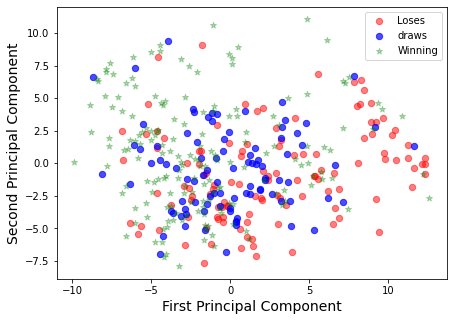

In [121]:
Xax=pca_premise_tw[:,0]
Yax=pca_premise_tw[:,1]
#labels=cancer.target
cdict={-1:'red',1:'green', 0:'blue'}
labl={1:'Winning',-1:'Loses', 0:'draws'}
marker={1:'*',-1:'o', 0:'o'}
alpha={1:.3, -1:.5, 0:.7}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(label):
    ix = np.where(label==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],s=40,label=labl[l],marker=marker[l],alpha=alpha[l])
# for loop ends
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()
# please check the scatter plot of the remaining component and you will understand the difference

/anaconda3/envs/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


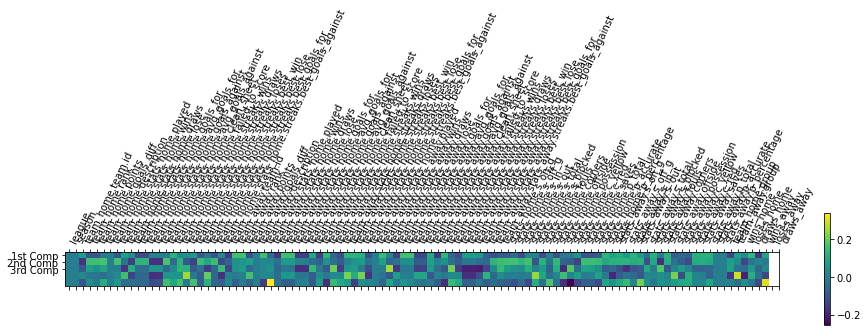

In [122]:
feature_names = df_premise.columns
plt.matshow(pca_tw.components_,cmap='viridis')
plt.yticks([0,1,2],['1st Comp','2nd Comp','3rd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(feature_names)),feature_names,rotation=65,ha='left')
plt.tight_layout()
plt.show()# 

In [196]:
# SVM algorithm, using premise
from sklearn.svm import SVC
sv_p = SVC(gamma='auto')
sv_p.fit(pca_premise, label)
results_premise["svm"] = sv_p.predict(pca_test_premise)
results_premise.head()

,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.played,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,team_home.stats_home.goals_for,...,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away,svm
191,518,19,24,-41,4,17,3,4,10,19.0,...,358.000000,279.437500,0.774375,1,4,0,1,3,1,-1
334,495,17,36,-21,0,17,6,1,10,21.0,...,502.250000,425.875000,0.842500,3,2,0,2,0,3,-1
360,492,7,56,9,0,17,8,3,6,26.0,...,528.388889,455.055556,0.856111,2,1,2,2,1,2,1
213,500,12,43,-10,0,17,4,7,6,21.0,...,388.933333,312.800000,0.802000,0,3,2,2,2,1,1
94,497,5,61,22,2,18,9,4,5,34.0,...,375.933333,299.800000,0.784000,4,0,1,2,0,3,1


In [197]:
print(results_premise["svm"])

191   -1
334   -1
360    1
213    1
94     1
49    -1
293   -1
102    1
183    1
364   -1
31    -1
253    1
236    1
321    1
170    1
51     1
1     -1
110   -1
71    -1
280    0
301   -1
335    0
123    1
344   -1
135   -1
188    1
205   -1
224    1
240    1
Name: svm, dtype: int64


In [198]:
# SVM, Not using premise
sv = SVC(gamma='auto')
sv.fit(pca_laliga, label)
results_laliga["svm"] = sv.predict(pca_test_laliga)
results_laliga.head()

,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.played,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,team_home.stats_home.goals_for,...,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away,svm
191,518,19,24,-41,4,17,3,4,10,19.0,...,358.000000,279.437500,0.774375,1,4,0,1,3,1,-1
334,495,17,36,-21,0,17,6,1,10,21.0,...,502.250000,425.875000,0.842500,3,2,0,2,0,3,-1
360,492,7,56,9,0,17,8,3,6,26.0,...,528.388889,455.055556,0.856111,2,1,2,2,1,2,1
213,500,12,43,-10,0,17,4,7,6,21.0,...,388.933333,312.800000,0.802000,0,3,2,2,2,1,1
94,497,5,61,22,2,18,9,4,5,34.0,...,375.933333,299.800000,0.784000,4,0,1,2,0,3,1


In [199]:
print(results_laliga["svm"])

191   -1
334   -1
360    1
213    1
94     1
49    -1
293   -1
102    1
183    1
364   -1
31     1
253    1
236    1
321    1
170    1
51     1
1      0
110   -1
71     1
280    0
301   -1
335    0
123    1
344   -1
135   -1
188    1
205   -1
224    1
240    1
Name: svm, dtype: int64


In [200]:
# SVM using premise with PCA
sv_p_fi = SVC(gamma='auto')
sv_p_fi.fit(pca_premise_fi, label)
results_premise["svm_pca_fi"] = sv_p_fi.predict(pca_test_premise_fi)
print(results_premise["svm_pca_fi"])
sv_p_tw = SVC(gamma='auto')
sv_p_tw.fit(pca_premise_tw, label)
results_premise["svm_pca_tw"] = sv_p_tw.predict(pca_test_premise_tw)
print(results_premise["svm_pca_tw"])

191    1
334   -1
360    1
213    1
94     1
49     1
293    1
102    1
183    1
364    1
31    -1
253    1
236    1
321    1
170   -1
51     1
1      1
110   -1
71     1
280   -1
301    1
335    1
123   -1
344   -1
135    1
188    1
205    1
224    1
240    1
Name: svm_pca_fi, dtype: int64
191    1
334   -1
360   -1
213    1
94    -1
49     1
293    1
102    1
183    1
364    1
31    -1
253    1
236   -1
321    1
170   -1
51     1
1      0
110    1
71     1
280    0
301    1
335    1
123    0
344   -1
135    1
188    1
205    1
224    1
240    1
Name: svm_pca_tw, dtype: int64


In [201]:
# SVM, Not using premise with PCA
sv_fi = SVC(gamma='auto')
sv_fi.fit(pca_laliga_fi, label)
results_laliga["svm_pca_fi"] = sv_fi.predict(pca_test_laliga_fi)
print(results_laliga["svm_pca_fi"])
sv_tw = SVC(gamma='auto')
sv_tw.fit(pca_laliga_tw, label)
results_laliga["svm_pca_tw"] = sv_tw.predict(pca_test_laliga_tw)
print(results_laliga["svm_pca_tw"])

191    1
334    1
360   -1
213    1
94     1
49     1
293    1
102    1
183    1
364    1
31     1
253    1
236   -1
321    1
170    1
51     1
1      1
110    1
71    -1
280    1
301    1
335    1
123    1
344    1
135    1
188    1
205    1
224    1
240   -1
Name: svm_pca_fi, dtype: int64
191    1
334    1
360   -1
213    1
94     1
49     1
293    1
102   -1
183    1
364    1
31    -1
253    1
236   -1
321    1
170    1
51     1
1      1
110    1
71    -1
280   -1
301    1
335    1
123    1
344    1
135    1
188   -1
205    1
224    1
240   -1
Name: svm_pca_tw, dtype: int64


In [202]:
df_premise.head()

,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.played,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,team_home.stats_home.goals_for,...,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,502,11,43,-2,0,18,4,8,6,18.0,...,3.0,426.0,334.0,0.78,2,0,3,2,2,1
2,502,11,43,-2,0,18,4,8,6,18.0,...,6.0,348.0,263.0,0.76,2,0,3,2,2,1
3,502,11,43,-2,0,18,4,8,6,18.0,...,3.0,552.0,470.0,0.85,2,0,3,3,0,2
4,502,11,43,-2,0,18,4,8,6,18.0,...,5.0,506.0,418.0,0.83,2,0,3,4,0,1
5,502,11,43,-2,0,18,4,8,6,18.0,...,3.0,522.0,444.0,0.85,2,0,3,2,1,2


In [203]:
# Naive Bayes, using premise
from sklearn.naive_bayes import GaussianNB
gnb_p = GaussianNB()
gnb_p.fit(df_premise, label)
results_premise["nb"] = gnb_p.predict(ts_premise)

In [204]:
# Regular NB
gnb = GaussianNB()
gnb_p.fit(df_laliga, label)
results_laliga["nb"] = gnb_p.predict(ts_laliga)
results_laliga.head()

,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.played,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,team_home.stats_home.goals_for,...,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away,svm,svm_pca_fi,svm_pca_tw,nb
191,518,19,24,-41,4,17,3,4,10,19.0,...,1,4,0,1,3,1,-1,1,1,-1
334,495,17,36,-21,0,17,6,1,10,21.0,...,3,2,0,2,0,3,-1,1,1,-1
360,492,7,56,9,0,17,8,3,6,26.0,...,2,1,2,2,1,2,1,-1,-1,1
213,500,12,43,-10,0,17,4,7,6,21.0,...,0,3,2,2,2,1,1,1,1,1
94,497,5,61,22,2,18,9,4,5,34.0,...,4,0,1,2,0,3,1,1,1,1


In [132]:
# Add ids # NO EN PCA
pca_laliga_fi['team_home.team.id'] = df_laliga['team_home.team.id'].values
pca_laliga_fi['team_away.team.id'] = df_laliga['team_away.team.id'].values
pca_premise_fi['team_home.team.id'] = df_laliga['team_home.team.id'].values
pca_premise_fi['team_away.team.id'] = df_laliga['team_away.team.id'].values
pca_test_laliga_fi['team_home.team.id'] = ts_laliga['team_home.team.id'].values
pca_test_laliga_fi['team_away.team.id'] = ts_laliga['team_away.team.id'].values
pca_test_premise_fi['team_home.team.id'] = ts_laliga['team_home.team.id'].values
pca_test_premise_fi['team_away.team.id'] = ts_laliga['team_away.team.id'].values

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [205]:
# NB using premise with PCA
gnb_p_fi = GaussianNB()
gnb_p_fi.fit(pca_premise_fi, label)
results_premise["nb_pca_fi"] = gnb_p_fi.predict(pca_test_premise_fi)
print(gnb_p_fi.predict_proba(pca_test_premise_fi)[9])
gnb_p_tw = GaussianNB()
gnb_p_tw.fit(pca_premise_tw, label)
results_premise["nb_pca_tw"] = gnb_p_tw.predict(pca_test_premise_tw)
results_premise.head(10)

[0.65818953 0.19836551 0.14344496]


,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.played,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,team_home.stats_home.goals_for,...,draws_home,wins_away,loses_away,draws_away,svm,svm_pca_fi,svm_pca_tw,nb,nb_pca_fi,nb_pca_tw
191,518,19,24,-41,4,17,3,4,10,19.0,...,0,1,3,1,-1,1,1,-1,-1,1
334,495,17,36,-21,0,17,6,1,10,21.0,...,0,2,0,3,-1,-1,-1,-1,-1,-1
360,492,7,56,9,0,17,8,3,6,26.0,...,2,2,1,2,1,1,-1,1,0,0
213,500,12,43,-10,0,17,4,7,6,21.0,...,2,2,2,1,1,1,1,1,1,1
94,497,5,61,22,2,18,9,4,5,34.0,...,1,2,0,3,1,1,-1,1,0,-1
49,504,9,46,0,0,17,8,5,4,25.0,...,4,1,3,1,-1,1,1,-1,0,0
293,493,20,19,-45,4,17,2,3,12,14.0,...,0,2,2,1,-1,1,1,1,1,1
102,490,13,42,-2,0,17,6,4,7,30.0,...,3,2,2,1,1,1,1,1,1,1
183,496,1,80,35,1,17,15,2,0,43.0,...,2,3,2,0,1,1,1,1,1,1
364,523,10,43,-2,0,18,7,2,9,25.0,...,1,3,0,2,-1,1,1,-1,-1,-1


In [206]:
# NB, Not using premise with PCA
gnb_fi = GaussianNB()
gnb_fi.fit(pca_laliga_fi, label)
results_laliga["nb_pca_fi"] = gnb_fi.predict(pca_test_laliga_fi)
gnb_tw = GaussianNB()
gnb_tw.fit(pca_laliga_tw, label)
results_laliga["nb_pca_tw"] = gnb_tw.predict(pca_test_laliga_tw)
results_laliga.head()

,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.played,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,team_home.stats_home.goals_for,...,draws_home,wins_away,loses_away,draws_away,svm,svm_pca_fi,svm_pca_tw,nb,nb_pca_fi,nb_pca_tw
191,518,19,24,-41,4,17,3,4,10,19.0,...,0,1,3,1,-1,1,1,-1,1,1
334,495,17,36,-21,0,17,6,1,10,21.0,...,0,2,0,3,-1,1,1,-1,-1,-1
360,492,7,56,9,0,17,8,3,6,26.0,...,2,2,1,2,1,-1,-1,1,0,0
213,500,12,43,-10,0,17,4,7,6,21.0,...,2,2,2,1,1,1,1,1,0,1
94,497,5,61,22,2,18,9,4,5,34.0,...,1,2,0,3,1,1,1,1,0,1


In [143]:
"""
    Feature Selection:
    Test against ANOVA f-score
"""

'\n    Feature Selection:\n    Test against ANOVA f-score\n'

In [207]:
from sklearn.feature_selection import SelectKBest, f_classif

In [208]:
# Using ANOVA f-score
best_features_premise = SelectKBest(f_classif, k=20).fit(df_premise, label)
best_features = SelectKBest(f_classif, k=20).fit(df_laliga, label)
df_chi = best_features.transform(df_laliga)
premise_chi = best_features_premise.transform(df_premise)
ts_chi = best_features.transform(ts_laliga)
ts_premise_chi = best_features_premise.transform(ts_premise)

In [209]:
# Using Gaussian Naive Bayes and chi-squared
gnb_p_chi = GaussianNB()
gnb_p_chi.fit(premise_chi, label)
results_premise["nb_fval"] = gnb_p_chi.predict(ts_premise_chi)
gnb_chi = GaussianNB()
gnb_chi.fit(df_chi, label)
results_laliga["nb_fval"] = gnb_chi.predict(ts_chi)
results_premise.head(10)

,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.played,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,team_home.stats_home.goals_for,...,wins_away,loses_away,draws_away,svm,svm_pca_fi,svm_pca_tw,nb,nb_pca_fi,nb_pca_tw,nb_fval
191,518,19,24,-41,4,17,3,4,10,19.0,...,1,3,1,-1,1,1,-1,-1,1,1
334,495,17,36,-21,0,17,6,1,10,21.0,...,2,0,3,-1,-1,-1,-1,-1,-1,-1
360,492,7,56,9,0,17,8,3,6,26.0,...,2,1,2,1,1,-1,1,0,0,0
213,500,12,43,-10,0,17,4,7,6,21.0,...,2,2,1,1,1,1,1,1,1,1
94,497,5,61,22,2,18,9,4,5,34.0,...,2,0,3,1,1,-1,1,0,-1,0
49,504,9,46,0,0,17,8,5,4,25.0,...,1,3,1,-1,1,1,-1,0,0,-1
293,493,20,19,-45,4,17,2,3,12,14.0,...,2,2,1,-1,1,1,1,1,1,1
102,490,13,42,-2,0,17,6,4,7,30.0,...,2,2,1,1,1,1,1,1,1,1
183,496,1,80,35,1,17,15,2,0,43.0,...,3,2,0,1,1,1,1,1,1,1
364,523,10,43,-2,0,18,7,2,9,25.0,...,3,0,2,-1,1,1,-1,-1,-1,-1


In [210]:
# Using Random Forests for Training with all Features
from sklearn.ensemble import RandomForestClassifier
# At least two matches en each classification per week
premise_clf = RandomForestClassifier(criterion="entropy", max_features="log2", min_samples_leaf=2).fit(df_premise, label)
results_premise["rf"] = premise_clf.predict(ts_premise)
laliga_clf = RandomForestClassifier(criterion="entropy", max_features="log2", min_samples_leaf=2).fit(df_laliga, label)
results_laliga["rf"] = laliga_clf.predict(ts_laliga)

In [211]:
from sklearn.feature_selection import mutual_info_classif
# Using mutual_info_classif
best_info_premise = mutual_info_classif(df_premise, label, discrete_features=[])
best_info = SelectKBest(chi2, k=20).fit(df_laliga, label)
df_info = best_features.transform(df_laliga)
premise_info = best_features_premise.transform(df_premise)
ts_info = best_features.transform(ts_laliga)
ts_premise_info = best_features_premise.transform(ts_premise)

ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

In [212]:
def prob(x, result):
    count = 0
    result = float(result)
    if x["nb"] == result:
        count = count + 1
    if x["nb_pca_fi"] == result:
        count = count + 1
    if x["nb_pca_tw"] == result:
        count = count + 1
    if x["nb_fval"] == result:
        count = count + 1
    if x["rf"] == result:
        count = count + 1
    return count/5

In [213]:
# Probability
win_result = '1'
lose_result = '-1'
draw_result = '0'
results_laliga["w_p"] = results_laliga.apply(prob, args=(win_result), axis=1)
results_laliga["d_p"] = results_laliga.apply(prob, args=(draw_result), axis=1)
results_laliga["l_p"] = 1 - (results_laliga["w_p"] + results_laliga["d_p"])
results_laliga.head()

,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.played,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,team_home.stats_home.goals_for,...,svm_pca_fi,svm_pca_tw,nb,nb_pca_fi,nb_pca_tw,nb_fval,rf,w_p,d_p,l_p
191,518,19,24,-41,4,17,3,4,10,19.0,...,1,1,-1,1,1,1,-1,0.6,0.0,0.4
334,495,17,36,-21,0,17,6,1,10,21.0,...,1,1,-1,-1,-1,-1,-1,0.0,0.0,1.0
360,492,7,56,9,0,17,8,3,6,26.0,...,-1,-1,1,0,0,0,1,0.4,0.6,0.0
213,500,12,43,-10,0,17,4,7,6,21.0,...,1,1,1,0,1,1,1,0.8,0.2,0.0
94,497,5,61,22,2,18,9,4,5,34.0,...,1,1,1,0,1,0,1,0.6,0.4,0.0


In [214]:
results_premise["w_p"] = results_premise.apply(prob, args=(win_result), axis=1)
results_premise["d_p"] = results_premise.apply(prob, args=(draw_result), axis=1)
results_premise["l_p"] = 1 - (results_premise["w_p"] + results_premise["d_p"])
results_premise.head(10)

,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.played,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,team_home.stats_home.goals_for,...,svm_pca_fi,svm_pca_tw,nb,nb_pca_fi,nb_pca_tw,nb_fval,rf,w_p,d_p,l_p
191,518,19,24,-41,4,17,3,4,10,19.0,...,1,1,-1,-1,1,1,-1,0.4,0.0,0.6
334,495,17,36,-21,0,17,6,1,10,21.0,...,-1,-1,-1,-1,-1,-1,-1,0.0,0.0,1.0
360,492,7,56,9,0,17,8,3,6,26.0,...,1,-1,1,0,0,0,1,0.4,0.6,0.0
213,500,12,43,-10,0,17,4,7,6,21.0,...,1,1,1,1,1,1,1,1.0,0.0,0.0
94,497,5,61,22,2,18,9,4,5,34.0,...,1,-1,1,0,-1,0,-1,0.2,0.4,0.4
49,504,9,46,0,0,17,8,5,4,25.0,...,1,1,-1,0,0,-1,-1,0.0,0.4,0.6
293,493,20,19,-45,4,17,2,3,12,14.0,...,1,1,1,1,1,1,-1,0.8,0.0,0.2
102,490,13,42,-2,0,17,6,4,7,30.0,...,1,1,1,1,1,1,1,1.0,0.0,0.0
183,496,1,80,35,1,17,15,2,0,43.0,...,1,1,1,1,1,1,1,1.0,0.0,0.0
364,523,10,43,-2,0,18,7,2,9,25.0,...,1,1,-1,-1,-1,-1,-1,0.0,0.0,1.0


In [215]:
# Adding name columns
results_laliga["team_home.team.name"] = ts_name["team_home.team.name"]
results_laliga["team_away.team.name"] = ts_name["team_away.team.name"]
results_premise["team_home.team.name"] = ts_name["team_home.team.name"]
results_premise["team_away.team.name"] = ts_name["team_away.team.name"]

In [216]:
# csv to save
file_title = 'seriea_p36.csv'
results_file = dirCountry + file_title
file_title = 'premise_p36.csv'
results_premise_file = dirCountry + file_title

In [217]:
results_laliga.to_csv(results_file)
results_premise.to_csv(results_premise_file)

In [208]:
# Bayesian Gaussian Mixture Clustering using premise with PCA
from sklearn.mixture import BayesianGaussianMixture 
"""
bc_p_fi = BayesianGaussianMixture(n_components = 3, covariance_type ='full')
bc_p_fi.fit(pca_premise_fi, label)
results_premise["bc_pca_fi_full"] = bc_p_fi.predict(pca_test_premise_fi) - 1
bc_p_fi_s = BayesianGaussianMixture(n_components = 3, covariance_type ='spherical')
bc_p_fi_s.fit(pca_premise_fi, label)
results_premise["bc_pca_fi_sph"] = bc_p_fi_s.predict(pca_test_premise_fi) - 1
bc_p_tw = BayesianGaussianMixture(n_components = 3, covariance_type ='full')
bc_p_tw.fit(pca_premise_tw, label)
results_premise["bc_pca_tw_full"] = bc_p_tw.predict(pca_test_premise_tw) - 1
bc_p_tw_s = BayesianGaussianMixture(n_components = 3, covariance_type ='spherical')
bc_p_tw_s.fit(pca_premise_tw, label)
results_premise["bc_pca_tw_sph"] = bc_p_tw_s.predict(pca_test_premise_tw) - 1
results_premise.head()
"""

'\nbc_p_fi = BayesianGaussianMixture(n_components = 3, covariance_type =\'full\')\nbc_p_fi.fit(pca_premise_fi, label)\nresults_premise["bc_pca_fi_full"] = bc_p_fi.predict(pca_test_premise_fi) - 1\nbc_p_fi_s = BayesianGaussianMixture(n_components = 3, covariance_type =\'spherical\')\nbc_p_fi_s.fit(pca_premise_fi, label)\nresults_premise["bc_pca_fi_sph"] = bc_p_fi_s.predict(pca_test_premise_fi) - 1\nbc_p_tw = BayesianGaussianMixture(n_components = 3, covariance_type =\'full\')\nbc_p_tw.fit(pca_premise_tw, label)\nresults_premise["bc_pca_tw_full"] = bc_p_tw.predict(pca_test_premise_tw) - 1\nbc_p_tw_s = BayesianGaussianMixture(n_components = 3, covariance_type =\'spherical\')\nbc_p_tw_s.fit(pca_premise_tw, label)\nresults_premise["bc_pca_tw_sph"] = bc_p_tw_s.predict(pca_test_premise_tw) - 1\nresults_premise.head()\n'

In [499]:
# Testing Gaussian Clustering

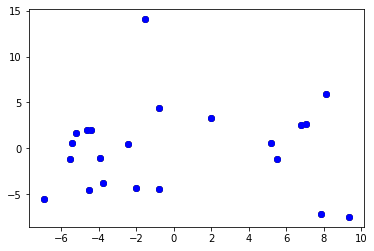

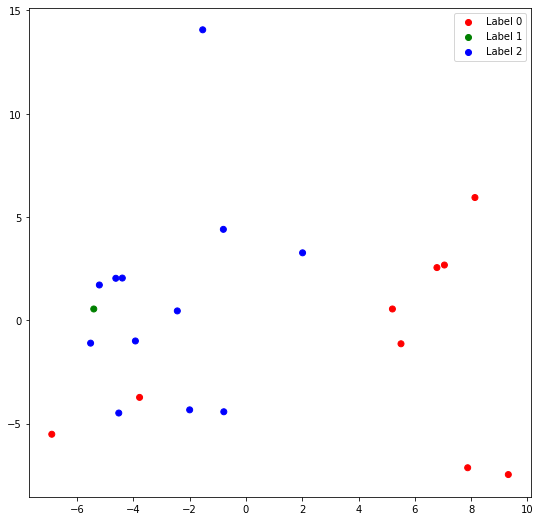

In [308]:
Xax=pca_test_premise_tw[:,0]
Yax=pca_test_premise_tw[:,1]
labels_full = results_premise["nb_pca_tw"]
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
  
# Building the colour vector for each data point 
cvec = [colours[label+1] for label in labels_full] 
  
# Defining the scatter plot for each colour 
r = plt.scatter(Xax, Yax, color ='r');
g = plt.scatter(Xax, Yax, color ='g'); 
b = plt.scatter(Xax, Yax, color ='b'); 

  
# Plotting the clustered data 
plt.figure(figsize =(9, 9)) 
plt.scatter(Xax, Yax, c = cvec) 
plt.legend((r, g, b), ('Label 0', 'Label 1', 'Label 2')) 
plt.show() 

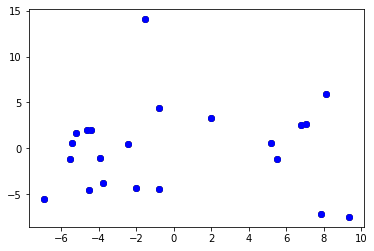

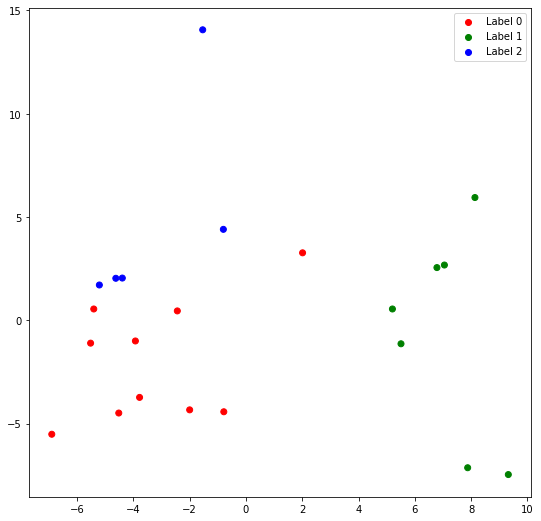

In [309]:
Xax=pca_test_premise_tw[:,0]
Yax=pca_test_premise_tw[:,1]
labels_full = results_premise["bc_pca_tw_sph"]
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
  
# Building the colour vector for each data point 
cvec = [colours[label+1] for label in labels_full] 
  
# Defining the scatter plot for each colour 
r = plt.scatter(Xax, Yax, color ='r');
g = plt.scatter(Xax, Yax, color ='g'); 
b = plt.scatter(Xax, Yax, color ='b'); 

  
# Plotting the clustered data 
plt.figure(figsize =(9, 9)) 
plt.scatter(Xax, Yax, c = cvec) 
plt.legend((r, g, b), ('Label 0', 'Label 1', 'Label 2')) 
plt.show()

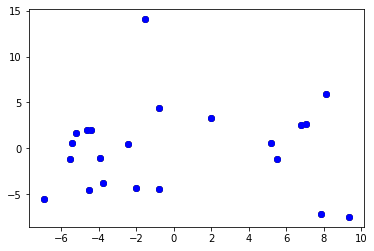

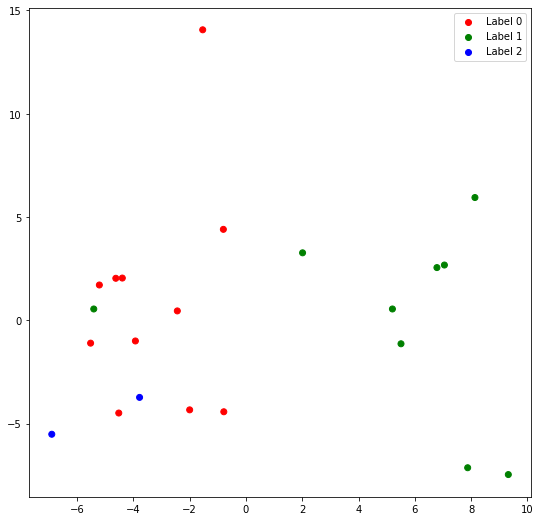

In [310]:
Xax=pca_test_premise_tw[:,0]
Yax=pca_test_premise_tw[:,1]
labels_full = results_premise["bc_pca_tw_full"]
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
  
# Building the colour vector for each data point 
cvec = [colours[label+1] for label in labels_full] 
  
# Defining the scatter plot for each colour 
r = plt.scatter(Xax, Yax, color ='r');
g = plt.scatter(Xax, Yax, color ='g'); 
b = plt.scatter(Xax, Yax, color ='b'); 

  
# Plotting the clustered data 
plt.figure(figsize =(9, 9)) 
plt.scatter(Xax, Yax, c = cvec) 
plt.legend((r, g, b), ('Label 0', 'Label 1', 'Label 2')) 
plt.show() 